In this lab, you will be using the Sakila database of movie rentals.

In order to optimize our inventory, we would like to know which films will be rented. We are asked to create a model to predict it. So we use the information we have from May 2005 to create the model.

# Instructions

1.Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features (X).

2.Create a query to get the list of all unique film titles and a boolean indicating if it was rented (rental_date) in May 2005. (Create new column called - 'rented_in_may'). This will be our TARGET (y) variable.

3.Read the data into a Pandas dataframe. At this point you should have 1000 rows. Number of columns depends on the number of features you chose.

4.Analyze extracted features (X) and transform them. You may need to encode some categorical variables, or scale numerical variables.

5.Create a logistic regression model to predict 'rented_in_may' from the cleaned data.

6.Evaluate the results.

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [3]:
#1.Create a query or queries to extract the information you think may be relevant for building the prediction model.
#It should include some film features and some rental features (X).
query1 = '''SELECT f.title, f.release_year, f.rental_rate, f.length, f.rating, f.special_features, COUNT(r.rental_date) AS num_rentals
FROM film AS f
LEFT JOIN inventory AS i ON f.film_id = i.film_id
LEFT JOIN rental AS r ON i.inventory_id = r.inventory_id
GROUP BY f.film_id;'''

data = pd.read_sql_query(query1, engine)
data

,title,release_year,rental_rate,length,rating,special_features,num_rentals
0,ACADEMY DINOSAUR,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",23
1,ACE GOLDFINGER,2006,4.99,48,G,"Trailers,Deleted Scenes",7
2,ADAPTATION HOLES,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",12
3,AFFAIR PREJUDICE,2006,2.99,117,G,"Commentaries,Behind the Scenes",23
4,AFRICAN EGG,2006,2.99,130,G,Deleted Scenes,12
...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,2006,0.99,183,G,"Trailers,Behind the Scenes",7
996,YOUTH KICK,2006,0.99,179,NC-17,"Trailers,Behind the Scenes",6
997,ZHIVAGO CORE,2006,0.99,105,NC-17,Deleted Scenes,9
998,ZOOLANDER FICTION,2006,2.99,101,R,"Trailers,Deleted Scenes",17


In [4]:
#2.Create a query to get the list of all unique film titles and a boolean indicating if it was rented (rental_date) in May 2005. (Create new column called - 'rented_in_may').
#This will be our TARGET (y) variable.

In [5]:
query2 = '''SELECT f.film_id,  f.title, f.release_year, f.rental_rate, f.length, f.rating, COUNT(r.rental_date) AS num_rentals, COUNT(CASE WHEN MONTH(r.rental_date)= 5 AND YEAR(r.rental_date) = 2005 THEN 1 ELSE NULL END) > 0 AS rented_in_may
FROM film AS f
LEFT JOIN inventory AS i ON f.film_id = i.film_id
LEFT JOIN rental AS r ON i.inventory_id = r.inventory_id
GROUP BY f.film_id;'''

In [6]:
#3.Read the data into a Pandas dataframe. At this point you should have 1000 rows.
#Number of columns depends on the number of features you chose.

In [7]:
query2 = '''SELECT f.title, f.release_year, f.rental_rate, f.length, f.special_features, f.rating, COUNT(r.rental_date) AS num_rentals, COUNT(CASE WHEN MONTH(r.rental_date)= 5 AND YEAR(r.rental_date) = 2005 THEN 1 ELSE NULL END) > 0 AS rented_in_may
FROM film AS f
LEFT JOIN inventory AS i ON f.film_id = i.film_id
LEFT JOIN rental AS r ON i.inventory_id = r.inventory_id
GROUP BY f.film_id;'''

data = pd.read_sql_query(query2, engine)
data

,title,release_year,rental_rate,length,special_features,rating,num_rentals,rented_in_may
0,ACADEMY DINOSAUR,2006,0.99,86,"Deleted Scenes,Behind the Scenes",PG,23,1
1,ACE GOLDFINGER,2006,4.99,48,"Trailers,Deleted Scenes",G,7,0
2,ADAPTATION HOLES,2006,2.99,50,"Trailers,Deleted Scenes",NC-17,12,1
3,AFFAIR PREJUDICE,2006,2.99,117,"Commentaries,Behind the Scenes",G,23,1
4,AFRICAN EGG,2006,2.99,130,Deleted Scenes,G,12,1
...,...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,2006,0.99,183,"Trailers,Behind the Scenes",G,7,0
996,YOUTH KICK,2006,0.99,179,"Trailers,Behind the Scenes",NC-17,6,0
997,ZHIVAGO CORE,2006,0.99,105,Deleted Scenes,NC-17,9,1
998,ZOOLANDER FICTION,2006,2.99,101,"Trailers,Deleted Scenes",R,17,1


In [8]:
data['length'].value_counts()

85     17
179    13
112    13
84     13
73     12
       ..
81      3
96      2
66      2
95      2
55      2
Name: length, Length: 140, dtype: int64

In [9]:
duplicate_rows = data.duplicated()
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [10]:
data.dtypes

title                object
release_year          int64
rental_rate         float64
length                int64
special_features     object
rating               object
num_rentals           int64
rented_in_may         int64
dtype: object

In [11]:
#we drop the release_year column beacause it was tha same for all the movies
data = data.drop('release_year', axis=1)
data

,title,rental_rate,length,special_features,rating,num_rentals,rented_in_may
0,ACADEMY DINOSAUR,0.99,86,"Deleted Scenes,Behind the Scenes",PG,23,1
1,ACE GOLDFINGER,4.99,48,"Trailers,Deleted Scenes",G,7,0
2,ADAPTATION HOLES,2.99,50,"Trailers,Deleted Scenes",NC-17,12,1
3,AFFAIR PREJUDICE,2.99,117,"Commentaries,Behind the Scenes",G,23,1
4,AFRICAN EGG,2.99,130,Deleted Scenes,G,12,1
...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,0.99,183,"Trailers,Behind the Scenes",G,7,0
996,YOUTH KICK,0.99,179,"Trailers,Behind the Scenes",NC-17,6,0
997,ZHIVAGO CORE,0.99,105,Deleted Scenes,NC-17,9,1
998,ZOOLANDER FICTION,2.99,101,"Trailers,Deleted Scenes",R,17,1


In [12]:
#the title is not importante for the model
data = data.drop('title', axis=1)
data

,rental_rate,length,special_features,rating,num_rentals,rented_in_may
0,0.99,86,"Deleted Scenes,Behind the Scenes",PG,23,1
1,4.99,48,"Trailers,Deleted Scenes",G,7,0
2,2.99,50,"Trailers,Deleted Scenes",NC-17,12,1
3,2.99,117,"Commentaries,Behind the Scenes",G,23,1
4,2.99,130,Deleted Scenes,G,12,1
...,...,...,...,...,...,...
995,0.99,183,"Trailers,Behind the Scenes",G,7,0
996,0.99,179,"Trailers,Behind the Scenes",NC-17,6,0
997,0.99,105,Deleted Scenes,NC-17,9,1
998,2.99,101,"Trailers,Deleted Scenes",R,17,1


In [13]:
#4.Analyze extracted features (X) and transform them.
#You may need to encode some categorical variables, or scale numerical variables.

C:\Users\jessi\AppData\Local\Temp\ipykernel_19212\1349209864.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()  # default


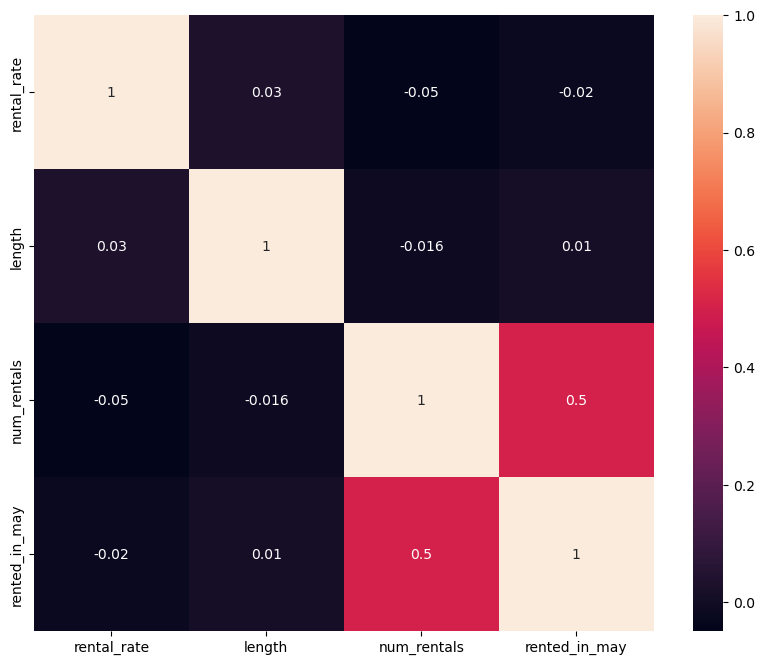

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data.corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [15]:
#in the heatmap there is nothing with a high correlation so we we don't drop anything

In [16]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [17]:
X=data.drop('rented_in_may', axis=1)     
y=data['rented_in_may']

In [18]:
#train/test split : X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [19]:
#num/cat split : X_train_num, X_train_cat, X_test_num, X_test_cat

In [20]:
#X train num
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)


# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,rental_rate,length,num_rentals
0,1.0,0.769784,0.235294
1,0.0,0.151079,0.705882
2,0.5,0.258993,0.588235
3,1.0,0.223022,0.852941
4,0.0,0.733813,0.470588
...,...,...,...
795,0.0,0.151079,0.176471
796,0.0,0.683453,0.558824
797,1.0,0.467626,0.617647
798,1.0,0.906475,0.411765


In [21]:
#X train cat

X_train_categorical = X_train.select_dtypes(include = object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['special_features', 'rating'],
                             drop_first=True)
X_train_cat

,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes",rating_NC-17,rating_PG,rating_PG-13,rating_R
46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
789,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
722,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
283,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
39,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
232,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
189,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [22]:
#build X_train and y_train
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)
X_train_transformed

array([[1.        , 0.76978417, 0.23529412, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.15107914, 0.70588235, ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.25899281, 0.58823529, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.4676259 , 0.61764706, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.90647482, 0.41176471, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.31654676, 0.44117647, ..., 0.        , 1.        ,
        0.        ]])

In [23]:
#X test num
# for numericals
X_test_num = X_test.select_dtypes(include = np.number)


# Scaling data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)
X_test_norm.head()

,0,1,2
0,0.0,0.374101,0.264706
1,0.5,0.964029,0.411765
2,0.5,0.316547,0.617647
3,0.5,0.618705,0.000000
4,0.0,0.453237,0.882353


In [24]:
#this way we have the names in the columns
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm.head()

,rental_rate,length,num_rentals
0,0.0,0.374101,0.264706
1,0.5,0.964029,0.411765
2,0.5,0.316547,0.617647
3,0.5,0.618705,0.000000
4,0.0,0.453237,0.882353


In [25]:
#X test cat
# for categoricals
X_test_categorical = X_test.select_dtypes(include = object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['special_features', 'rating'],
                            drop_first=True)


In [26]:
X_test_cat

,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes",rating_NC-17,rating_PG,rating_PG-13,rating_R
977,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
15,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
56,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
747,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
369,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
470,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
806,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [27]:
X_train_cat.columns

Index(['special_features_Commentaries',
       'special_features_Commentaries,Behind the Scenes',
       'special_features_Commentaries,Deleted Scenes',
       'special_features_Commentaries,Deleted Scenes,Behind the Scenes',
       'special_features_Deleted Scenes',
       'special_features_Deleted Scenes,Behind the Scenes',
       'special_features_Trailers',
       'special_features_Trailers,Behind the Scenes',
       'special_features_Trailers,Commentaries',
       'special_features_Trailers,Commentaries,Behind the Scenes',
       'special_features_Trailers,Commentaries,Deleted Scenes',
       'special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes',
       'special_features_Trailers,Deleted Scenes',
       'special_features_Trailers,Deleted Scenes,Behind the Scenes',
       'rating_NC-17', 'rating_PG', 'rating_PG-13', 'rating_R'],
      dtype='object')

In [28]:
# verify that dummies columns are in the same order and that the same column was dropped
list(zip(list(X_train_cat.columns),list(X_test_cat.columns)))

[('special_features_Commentaries', 'special_features_Commentaries'),
 ('special_features_Commentaries,Behind the Scenes',
  'special_features_Commentaries,Behind the Scenes'),
 ('special_features_Commentaries,Deleted Scenes',
  'special_features_Commentaries,Deleted Scenes'),
 ('special_features_Commentaries,Deleted Scenes,Behind the Scenes',
  'special_features_Commentaries,Deleted Scenes,Behind the Scenes'),
 ('special_features_Deleted Scenes', 'special_features_Deleted Scenes'),
 ('special_features_Deleted Scenes,Behind the Scenes',
  'special_features_Deleted Scenes,Behind the Scenes'),
 ('special_features_Trailers', 'special_features_Trailers'),
 ('special_features_Trailers,Behind the Scenes',
  'special_features_Trailers,Behind the Scenes'),
 ('special_features_Trailers,Commentaries',
  'special_features_Trailers,Commentaries'),
 ('special_features_Trailers,Commentaries,Behind the Scenes',
  'special_features_Trailers,Commentaries,Behind the Scenes'),
 ('special_features_Trailers

In [29]:
list(X_train_cat.columns)==list(X_test_cat.columns)
##if the answer is not true, we need need to reorder. with the onehot encoder this is easier because we guaranteed the same order
#with the on_hot_encoder we fit on the train set, then reuse tat encoder on both train and test and guarantee the same order.

True

In [30]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [31]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [32]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)

#the model has a good predictive value but it could be better

0.775

In [33]:
print(y_test.value_counts())

1    138
0     62
Name: rented_in_may, dtype: int64


In [34]:
pd.Series(predictions).value_counts()
# This shows that the disparity in the numbers are amplified by the model

1    149
0     51
dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
#the 34 and 121 are the correct prediction values

array([[ 34,  28],
       [ 17, 121]], dtype=int64)

In [36]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

0.645

In [ ]:
#the KNeighborsClassifier value could be higher